In [919]:
text = '''Reinforcement Learning (RL) is a subfield of machine learning concerned with how agents ought to take actions in an environment in order to maximize some notion of cumulative reward. The essence of RL is learning by interacting with an environment. RL aims to solve problems in dynamic and uncertain environments where the agent does not have complete knowledge of the environment's dynamics. Instead, the agent learns from trial and error, receiving feedback in the form of rewards or penalties for its actions.

At the core of RL lies the concept of an agent interacting with an environment. The agent observes the current state of the environment, selects an action to take based on its current policy, and receives feedback from the environment in the form of rewards or penalties. The agent's goal is to learn a policy that maximizes the cumulative reward over time.

RL has found applications in a wide range of domains, including robotics, autonomous vehicles, game playing, finance, healthcare, and more. In robotics, RL algorithms are used to train robots to perform complex tasks such as grasping objects, navigating environments, and interacting with humans. In autonomous vehicles, RL is used to optimize driving policies for tasks like lane-keeping, collision avoidance, and route planning. In finance, RL algorithms are employed for algorithmic trading, portfolio management, and risk assessment.

One of the key challenges in RL is the trade-off between exploration and exploitation. Agents must explore the environment to discover potentially better policies, while also exploiting known policies to maximize short-term rewards. Balancing exploration and exploitation is crucial for achieving optimal performance in RL tasks.

Several algorithms have been developed to address different aspects of RL, including value iteration, policy iteration, Q-learning, deep Q-networks (DQN), policy gradients, actor-critic methods, and more. These algorithms vary in their approach to learning and decision-making, with some focusing on estimating value functions, others on learning policies directly, and still others combining both approaches.

Overall, RL represents a powerful framework for learning to make sequential decisions in complex and uncertain environments. As research in RL continues to advance, the potential for RL to revolutionize fields ranging from robotics to healthcare remains vast, promising a future where intelligent agents can learn to interact with and adapt to their surroundings autonomously.'''

In [920]:
import re
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())
tokens = tokenize(text)
print(tokens)

['reinforcement', 'learning', 'rl', 'is', 'a', 'subfield', 'of', 'machine', 'learning', 'concerned', 'with', 'how', 'agents', 'ought', 'to', 'take', 'actions', 'in', 'an', 'environment', 'in', 'order', 'to', 'maximize', 'some', 'notion', 'of', 'cumulative', 'reward', 'the', 'essence', 'of', 'rl', 'is', 'learning', 'by', 'interacting', 'with', 'an', 'environment', 'rl', 'aims', 'to', 'solve', 'problems', 'in', 'dynamic', 'and', 'uncertain', 'environments', 'where', 'the', 'agent', 'does', 'not', 'have', 'complete', 'knowledge', 'of', 'the', "environment's", 'dynamics', 'instead', 'the', 'agent', 'learns', 'from', 'trial', 'and', 'error', 'receiving', 'feedback', 'in', 'the', 'form', 'of', 'rewards', 'or', 'penalties', 'for', 'its', 'actions', 'at', 'the', 'core', 'of', 'rl', 'lies', 'the', 'concept', 'of', 'an', 'agent', 'interacting', 'with', 'an', 'environment', 'the', 'agent', 'observes', 'the', 'current', 'state', 'of', 'the', 'environment', 'selects', 'an', 'action', 'to', 'take', 

In [921]:
len(set(tokens))

203

In [922]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [923]:
word_to_id, id_to_word = mapping(tokens)
print(word_to_id)
print(id_to_word)

{'overall': 0, 'sequential': 1, 'aspects': 2, 'management': 3, 'value': 4, 'maximize': 5, 'agent': 6, 'based': 7, 'making': 8, 'short': 9, 'agents': 10, 'dynamic': 11, 'receiving': 12, 'adapt': 13, 'performance': 14, 'achieving': 15, 'framework': 16, 'ranging': 17, 'have': 18, 'on': 19, 'more': 20, 'knowledge': 21, 'instead': 22, 'core': 23, 'finance': 24, 'complete': 25, 'playing': 26, 'subfield': 27, 'as': 28, 'trading': 29, 'risk': 30, 'or': 31, 'also': 32, 'these': 33, 'estimating': 34, 'is': 35, 'train': 36, 'algorithmic': 37, 'notion': 38, 'over': 39, 'crucial': 40, 'applications': 41, 'selects': 42, 'can': 43, 'domains': 44, 'deep': 45, 'iteration': 46, 'lies': 47, 'potentially': 48, 'interacting': 49, 'both': 50, 'cumulative': 51, 'challenges': 52, 'key': 53, 'off': 54, 'trial': 55, 'tasks': 56, 'represents': 57, 'powerful': 58, 'developed': 59, 'how': 60, 'goal': 61, 'healthcare': 62, 'still': 63, 'concept': 64, 'learn': 65, 'current': 66, 'dqn': 67, 'potential': 68, 'at': 69,

In [924]:
import numpy as np
np.random.seed(11)

In [925]:
def one_hot_encode(index, vocab_size):
    encoded = np.zeros(vocab_size)
    encoded[index] = 1
    return encoded

In [926]:
def generate_training_data(tokens, word_to_id, window):
    X, y = [], []
    vocab_size = len(word_to_id)
    
    for target_index, target_word in enumerate(tokens):
        target_id = word_to_id[target_word]
        
        for context_index, context_word in enumerate(tokens):
            if target_index != context_index and abs(target_index - context_index) <= window:
                context_id = word_to_id[context_word]
                X.append(one_hot_encode(target_id, vocab_size))
                y.append(one_hot_encode(context_id, vocab_size))
    
    return np.array(X), np.array(y)

In [927]:
X, y = generate_training_data(tokens, word_to_id, 4)

In [928]:
X.shape

(3036, 203)

In [929]:
y.shape

(3036, 203)

In [930]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    # model["w1"] = (model["w1"] - model["w1"].mean())/ model["w1"].std()
    # model["w2"] = (model["w2"] - model["w2"].mean())/ model["w2"].std()
    return model

In [931]:
model = init_network(len(word_to_id), 50)

In [932]:
def softmax(X):
    res = []
    X = (X-X.mean())/X.std()
    for x in X:
        # Normalize input values to prevent overflow or underflow
        exp = np.exp(x)
        softmax_probs = exp / exp.sum()
        res.append(softmax_probs + 1e-9)  # Add a small offset to avoid zero probabilities
    return res


In [933]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache


In [934]:
(X @ model["w1"] @ model["w2"]).shape

(3036, 203)

In [935]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

In [936]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)


/Users/adamerik/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/adamerik/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


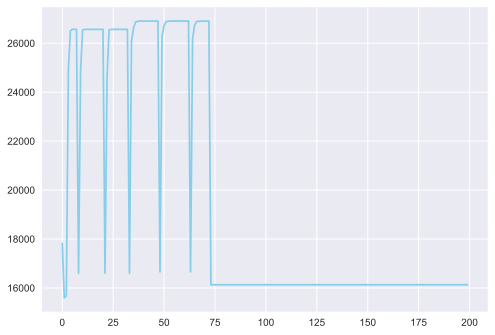

In [937]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

n_iter = 200
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()


In [938]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]
for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)


actor
still
vast
where
used
others
at
potential
dqn
current
learn
concept
healthcare
both
goal
how
developed
powerful
represents
tasks
trial
off
key
challenges
explore
vary
environment
state
environments
found
in
portfolio
policies
continues
by
has
complex
autonomous
decision
and
a
the
receives
critic
not
one
must
address
feedback
cumulative
interacting
with
receiving
instead
knowledge
more
on
have
ranging
framework
achieving
performance
adapt
dynamic
potentially
agents
short
making
based
agent
maximize
value
management
aspects
sequential
core
finance
complete
playing
lies
iteration
deep
domains
can
selects
applications
crucial
over
notion
algorithmic
train
is
estimating
these
also
or
risk
trading
as
subfield
combining
actions
does
an
are
for
dynamics
employed
policy
vehicles
surroundings
known
directly
aims
approaches
essence
optimize
environment's
research
perform
optimal
penalties
methods
gradients
different
revolutionize
such
take
time
wide
algorithms
agent's
intelligent
some
drivi

In [939]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]


In [940]:
get_embedding(model, "the")

array([-4.04881692e+131, -3.70087751e+131, -1.07933755e+132,
        4.53157810e+131, -2.58614144e+131,  1.42516061e+131,
       -1.04274408e+132,  6.30624160e+130, -9.34097450e+131,
        6.95287829e+131,  1.60549479e+131,  1.12975771e+132,
        5.95113598e+130,  3.32619777e+131, -5.10130913e+131,
       -1.87347323e+131, -1.59459122e+131,  1.46901842e+131,
       -3.22581782e+131,  3.35345343e+131,  2.11606190e+130,
       -4.54294176e+131, -6.48597997e+131, -2.35158231e+131,
       -2.83867733e+131, -9.30550887e+130, -8.61557628e+131,
        4.06837909e+130,  8.30241144e+130,  9.01982062e+130,
       -3.64919438e+131, -5.14466157e+130,  7.90543391e+131,
        5.98686891e+131,  1.42508430e+131,  2.36900935e+131,
       -4.01772787e+131,  1.53222820e+131, -1.47004994e+131,
        3.31756946e+131, -2.48142338e+131,  9.05855927e+131,
        4.93971828e+130, -2.32768640e+131,  3.47832619e+131,
       -6.51173161e+130,  8.38668500e+131, -1.45987459e+131,
       -6.22077983e+131,